In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# conn = sqlite3.connect("./backup/database_2024-08-12_09-23-18.db")

conn = sqlite3.connect("database.db")

sql = """
SELECT 
    BuergerBuero.stadt AS stadt,
    Termin.buergerbuero AS buergerbuero,
    Termin.datum AS datum,
    Termin.angelegenheit AS angelegenheit,
    Termin.erstmalsErfasstAlsFrei AS angelegt,
    Termin.erstmalsErfasstAlsBelegt AS belegt
FROM Termin
INNER JOIN BuergerBuero ON Termin.buergerbuero = BuergerBuero.stadtteil;
"""

df = pd.read_sql_query(sql, conn, parse_dates=["datum", "angelegt", "belegt"])
df.head()

,stadt,buergerbuero,datum,angelegenheit,angelegt,belegt
0,Dresden,Cotta,2024-08-19 09:15:00,Personalausweis - Antrag,2024-08-12 15:31:19.138282,2024-08-12 16:41:58.374892
1,Dresden,Cotta,2024-08-26 11:15:00,Personalausweis - Antrag,2024-08-12 15:31:19.138282,2024-08-12 19:10:29.070666
2,Dresden,Cotta,2024-08-26 11:30:00,Personalausweis - Antrag,2024-08-12 15:31:19.138282,2024-08-12 19:10:29.070666
3,Dresden,Cotta,2024-08-26 11:45:00,Personalausweis - Antrag,2024-08-12 15:31:19.138282,2024-08-12 19:10:29.070666
4,Dresden,Cotta,2024-08-26 12:00:00,Personalausweis - Antrag,2024-08-12 15:31:19.138282,2024-08-12 19:10:29.070666


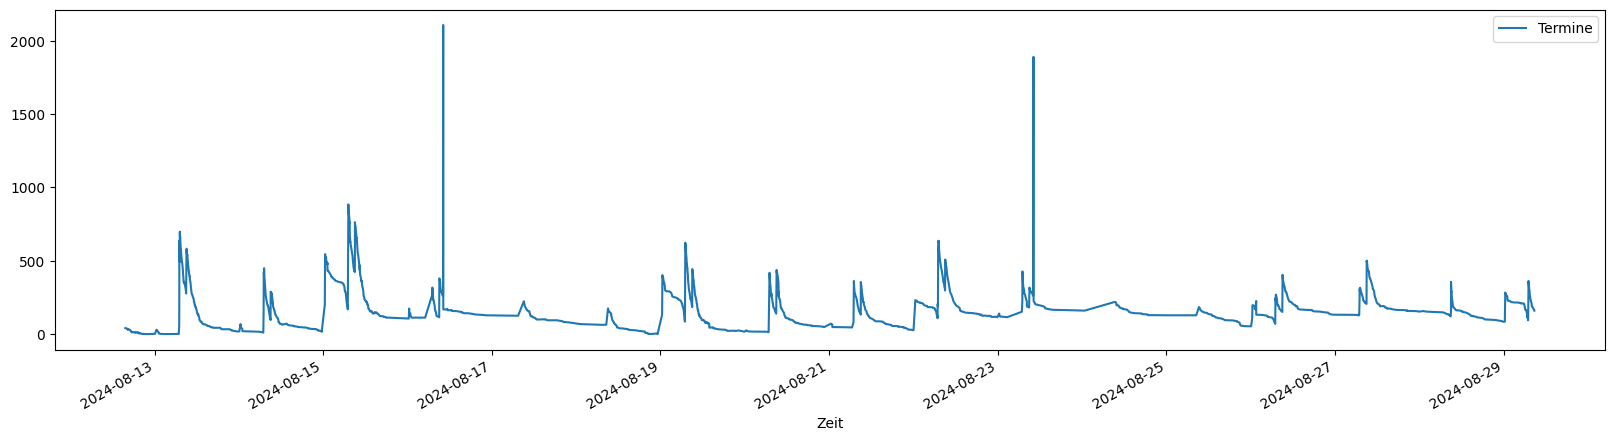

In [66]:
# alle Termine in Düsseldorf

df_city = df[df["stadt"] == "Duesseldorf"]  # 14 323 Termine

# sortiere aufsteigend nach belegt-Zeitpunkt

timestamps = df_city["belegt"].sort_values().unique()


count_open_per_timestamp = []

for timestamp in timestamps:

    # pro Zeitpunkt: wie viele Termine sind offen?
    # Termine sind zu einem Zeitpunkt offen, wenn ...
    count = df_city[
        # - der Anlegezeitpunkt vor (oder auf) dem Zeitpunkt liegt und ...
        (df_city["angelegt"] <= timestamp)
        # - der Belegtzeitpunkt entweder nach dem Zeitpunkt liegt oder gar nicht gesetzt ist
        & ((timestamp < df_city["belegt"]) | (df_city["belegt"].isnull()))
    ].shape[0]
    count_open_per_timestamp.append(count)

open = pd.DataFrame(
    {"Zeit": timestamps, "Termine": count_open_per_timestamp}
)

# plotte die Anzahl der offenen Termine pro belegt-Zeitpunkt
open.plot(x="Zeit", y="Termine", kind="line", figsize=(20, 5))

plt.show()

In [67]:
df_city_time_until = df_city['datum'] - df_city['angelegt']
df_city_time_until.describe()

count                        16042
mean     8 days 02:58:13.959587842
std      8 days 05:53:16.078407369
min         0 days 00:04:47.479802
25%         0 days 07:08:22.073340
50%         4 days 05:38:58.940041
75%        16 days 14:34:03.873816
max        21 days 08:43:48.365768
dtype: object

In [68]:
df_city_time_open = df_city['belegt'] - df_city['angelegt']
df_city_time_open.describe()

count                        15882
mean     0 days 03:15:25.644315537
std      0 days 10:49:03.770539329
min         0 days 00:00:26.531801
25%         0 days 00:02:00.329266
50%         0 days 00:26:00.997691
75%         0 days 01:56:04.591797
max         4 days 13:03:41.429315
dtype: object